####New lipofuscin subtraction analysis###

In [71]:
import os, sys
import numpy as np
import pandas as pd
from glob import glob 
from skimage.measure import regionprops
from skimage.io import imread, imsave
from os.path import abspath, dirname
sys.path.append("/Users/wangy6/Desktop/DATA/Codes/Python/n5_cut tiles/")
import n5_metadata_utils as n5mu
from scipy.spatial import distance

In [72]:
spots_raw=pd.read_csv('/Volumes/multifish/Yuhan/LHA3/analysis/spot/1_raw/1_raw_count_v3.csv',index_col=0, sep=',')

In [73]:
lipo=pd.read_csv('/Volumes/multifish/Yuhan/LHA3/analysis/spot/3_lipoRemove/lipo_analysis_v3.csv',index_col=0, sep=',')

In [74]:
roi=pd.read_csv('/Volumes/multifish/Yuhan/LHA3/segmentation/roi_intact.csv',sep=',', index_col=0)

In [75]:
spots_raw=spots_raw[spots_raw.index.isin(roi.index)]
lipo=lipo[lipo.index.isin(roi.index)]

In [76]:
lipo['c0_mean']=lipo[['R4_c0_lipo','R5_lipo_c0','R6_lipo_c0','R7_lipo_c0','R8_lipo_c0','R9_lipo_c0','R10_lipo_c0']].mean(axis=1)
lipo['c0_median']=lipo[['R4_c0_lipo','R5_lipo_c0','R6_lipo_c0','R7_lipo_c0','R8_lipo_c0','R9_lipo_c0','R10_lipo_c0']].median(axis=1)

In [77]:
lipo['c1_mean']=lipo[['R4_c1_lipo','R5_lipo_c1','R6_lipo_c1','R7_lipo_c1','R8_lipo_c1','R9_lipo_c1','R10_lipo_c1']].mean(axis=1)
lipo['c1_median']=lipo[['R4_c1_lipo','R5_lipo_c1','R6_lipo_c1','R7_lipo_c1','R8_lipo_c1','R9_lipo_c1','R10_lipo_c1']].median(axis=1)

Approach ###1: 
For R2 and R3, subtract lipofuscin spots in cells based on the identified lipofuscins in corresponding rounds; 
For R4-R10, if the raw spots > 500 in either c0 or c1, then use the median lipofuscin counts (to avoid subtracting real spots); if the raw spots <500, then use the identified lipofuscins in corresponding rounds;

####Handling of R4-R10#####

In [78]:
lipo_v1=lipo.copy() ####Need to use .copy(), otherwise the original file gets over-written####
Uplimit=200
for i in roi.index:
    if (spots_raw.loc[i,'R4_c0']>Uplimit or spots_raw.loc[i,'R4_c1']>Uplimit)==True:
        lipo_v1.loc[i,'R4_c0_lipo']=lipo_v1.loc[i,'c0_median']
        lipo_v1.loc[i,'R4_c1_lipo']=lipo_v1.loc[i,'c1_median']

In [79]:
for i in roi.index:
    if (spots_raw.loc[i,'R5_c0']>Uplimit or spots_raw.loc[i,'R5_c1']>Uplimit)==True:
        lipo_v1.loc[i,'R5_lipo_c0']=lipo_v1.loc[i,'c0_median']
        lipo_v1.loc[i,'R5_lipo_c1']=lipo_v1.loc[i,'c1_median']

In [80]:
for i in roi.index:
    if (spots_raw.loc[i,'R6_c0']>Uplimit or spots_raw.loc[i,'R6_c1']>Uplimit)==True:
        lipo_v1.loc[i,'R6_lipo_c0']=lipo_v1.loc[i,'c0_median']
        lipo_v1.loc[i,'R6_lipo_c1']=lipo_v1.loc[i,'c1_median']

In [81]:
for i in roi.index:
    if (spots_raw.loc[i,'R7_c0']>Uplimit or spots_raw.loc[i,'R7_c1']>Uplimit)==True:
        lipo_v1.loc[i,'R7_lipo_c0']=lipo_v1.loc[i,'c0_median']
        lipo_v1.loc[i,'R7_lipo_c1']=lipo_v1.loc[i,'c1_median']

In [82]:
for i in roi.index:
    if (spots_raw.loc[i,'R8_c0']>Uplimit or spots_raw.loc[i,'R8_c1']>Uplimit)==True:
        lipo_v1.loc[i,'R8_lipo_c0']=lipo_v1.loc[i,'c0_median']
        lipo_v1.loc[i,'R8_lipo_c1']=lipo_v1.loc[i,'c1_median']

In [83]:
for i in roi.index:
    if (spots_raw.loc[i,'R9_c0']>Uplimit or spots_raw.loc[i,'R9_c1']>Uplimit)==True:
        lipo_v1.loc[i,'R9_lipo_c0']=lipo_v1.loc[i,'c0_median']
        lipo_v1.loc[i,'R9_lipo_c1']=lipo_v1.loc[i,'c1_median']

In [84]:
for i in roi.index:
    if (spots_raw.loc[i,'R10_c0']>Uplimit or spots_raw.loc[i,'R10_c1']>Uplimit)==True:
        lipo_v1.loc[i,'R10_lipo_c0']=lipo_v1.loc[i,'c0_median']
        lipo_v1.loc[i,'R10_lipo_c1']=lipo_v1.loc[i,'c1_median']

In [35]:
lipo_v1

,R2_lipo_c0,R2_lipo_c1,R3_lipo_c0,R3_lipo_c1,R4_c0_lipo,R4_c1_lipo,R5_lipo_c0,R5_lipo_c1,R6_lipo_c0,R6_lipo_c1,...,R8_lipo_c0,R8_lipo_c1,R9_lipo_c0,R9_lipo_c1,R10_lipo_c0,R10_lipo_c1,c0_mean,c0_median,c1_mean,c1_median
ROI #,,,,,,,,,,,,,,,,,,,,,
1,51,49,43,43,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.428571,0.0,1.428571,0.0
3,30,30,0,0,2.0,2.0,2.0,2.0,0.0,0.0,...,2.0,2.0,6.0,6.0,0.0,0.0,3.714286,2.0,4.142857,2.0
4,30,30,0,0,13.0,13.0,4.0,4.0,0.0,0.0,...,4.0,4.0,1.0,1.0,5.0,5.0,3.857143,4.0,3.857143,4.0
5,42,42,8,8,35.0,35.0,23.0,23.0,28.0,28.0,...,2.0,2.0,23.0,23.0,26.0,26.0,21.571429,23.0,21.571429,23.0
6,35,35,0,0,18.0,18.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,7.0,7.0,4.428571,1.0,4.428571,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24196,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
24197,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
24199,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.142857,0.0


In [85]:
lipo_v1.to_csv("/Volumes/multifish/Yuhan/LHA3/analysis/spot/3_lipoRemove/lipo_method1_v3.csv")

Approach ###2: 
For R2 and R3, subtract lipofuscin spots in cells based on the identified lipofuscins in corresponding rounds; 
For R4-R10, use the median lipofuscin counts (to avoid subtracting real spots)

####Handling of R2, R3, R4 to R10#####

In [86]:
lipo_v2=lipo.copy() ####Need to use .copy(), otherwise the original file gets over-written####
for i in roi.index:
    lipo_v2.loc[i,'R4_c0_lipo']=lipo_v2.loc[i,'c0_median']
    lipo_v2.loc[i,'R4_c1_lipo']=lipo_v2.loc[i,'c1_median']
    lipo_v2.loc[i,'R5_lipo_c0']=lipo_v2.loc[i,'c0_median']
    lipo_v2.loc[i,'R5_lipo_c1']=lipo_v2.loc[i,'c1_median']
    lipo_v2.loc[i,'R6_lipo_c0']=lipo_v2.loc[i,'c0_median']
    lipo_v2.loc[i,'R6_lipo_c1']=lipo_v2.loc[i,'c1_median']
    lipo_v2.loc[i,'R7_lipo_c0']=lipo_v2.loc[i,'c0_median']
    lipo_v2.loc[i,'R7_lipo_c1']=lipo_v2.loc[i,'c1_median']
    lipo_v2.loc[i,'R8_lipo_c0']=lipo_v2.loc[i,'c0_median']
    lipo_v2.loc[i,'R8_lipo_c1']=lipo_v2.loc[i,'c1_median']
    lipo_v2.loc[i,'R9_lipo_c0']=lipo_v2.loc[i,'c0_median']
    lipo_v2.loc[i,'R9_lipo_c1']=lipo_v2.loc[i,'c1_median']
    lipo_v2.loc[i,'R10_lipo_c0']=lipo_v2.loc[i,'c0_median']
    lipo_v2.loc[i,'R10_lipo_c1']=lipo_v2.loc[i,'c1_median']

In [87]:
lipo_v2.to_csv("/Volumes/multifish/Yuhan/LHA3/analysis/spot/3_lipoRemove/lipo_method2_v3.csv")

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
c0_v1=lipo_v1[lipo_v1.columns[pd.Series(lipo_v1.columns).str.contains("c0")]]

In [45]:
c0_v1=c0_v1.drop(columns=['c0_mean','c0_median'])

In [46]:
c0_sel=c0_v1.loc[(1,39,42,71,80,88,93,97,104,118,125,126,145,147,164),:]
c0_sel.head()

,R2_lipo_c0,R3_lipo_c0,R4_c0_lipo,R5_lipo_c0,R6_lipo_c0,R7_lipo_c0,R8_lipo_c0,R9_lipo_c0,R10_lipo_c0
ROI #,,,,,,,,,
1,51,43,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,29,28,6.0,1.0,5.0,1.0,0.0,1.0,0.0
42,31,0,21.0,15.0,23.0,15.0,15.0,15.0,21.0
71,27,13,10.0,5.0,7.0,5.0,0.0,4.0,5.0
80,27,0,18.0,4.0,0.0,4.0,4.0,8.0,4.0


<Figure size 2160x720 with 0 Axes>

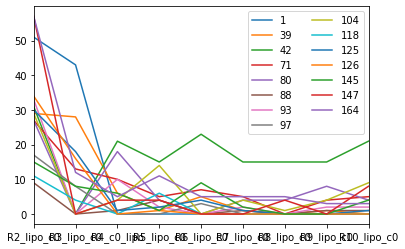

In [47]:
plt.figure(figsize=(30,10));
c0_sel.transpose().plot.line()
plt.legend(loc=1, ncol=2)

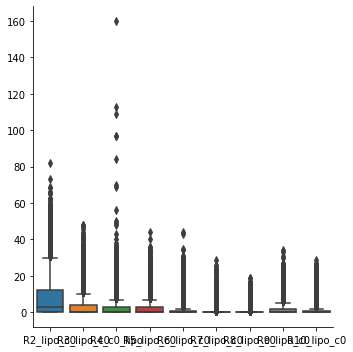

In [49]:
sns.catplot(kind="box", data=c0_v1)

In [53]:
c0=lipo[lipo.columns[pd.Series(lipo.columns).str.contains("c0")]]
c0=c0.drop(columns=['c0_mean','c0_median'])

<Figure size 2160x720 with 0 Axes>

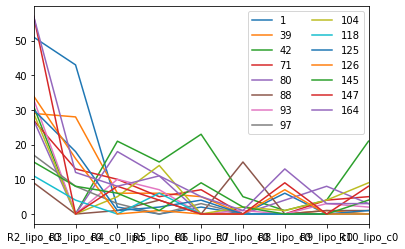

In [54]:
c0_sel=c0.loc[(1,39,42,71,80,88,93,97,104,118,125,126,145,147,164),:]
c0_sel.head()
plt.figure(figsize=(30,10));
c0_sel.transpose().plot.line()
plt.legend(loc=1, ncol=2)

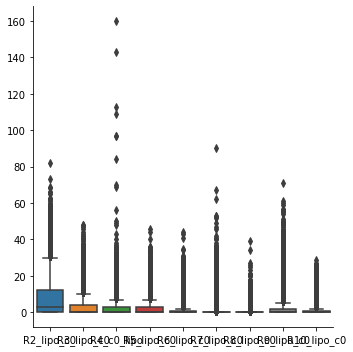

In [57]:
sns.catplot(kind="box", data=c0)

In [58]:
c0_v2=lipo_v2[lipo_v2.columns[pd.Series(lipo_v2.columns).str.contains("c0")]]

In [59]:
c0_v2=c0_v2.drop(columns=['c0_mean','c0_median'])

In [60]:
c0_v2_sel=c0_v2.loc[(1,39,42,71,80,88,93,97,104,118,125,126,145,147,164),:]

<Figure size 2160x720 with 0 Axes>

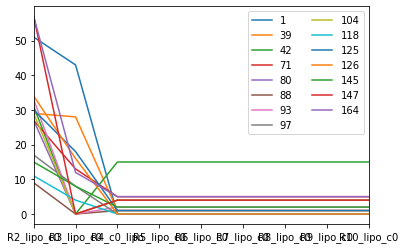

In [61]:
plt.figure(figsize=(30,10));
c0_v2_sel.transpose().plot.line()
plt.legend(loc=1, ncol=2)

In [ ]:
plt.figure(figsize=(30,10));
c0_v1.head(15).transpose().plot.line()
plt.legend(loc=1, ncol=2)

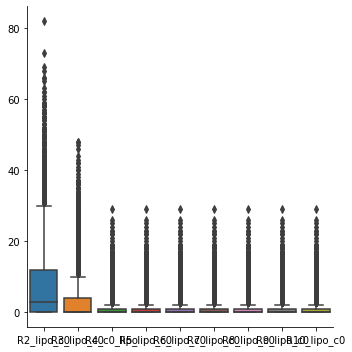

In [64]:
sns.catplot(kind="box", data=c0_v2)

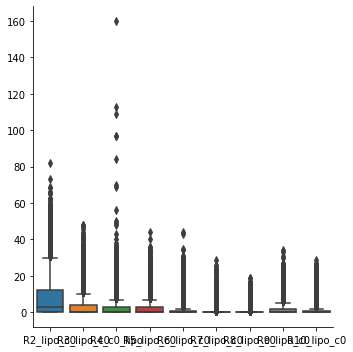

In [70]:
sns.catplot(kind="box", data=c0_v1)

In [68]:
a=spots_raw.loc[spots_raw.index[c0_v1['R4_c0_lipo']>60]]

In [65]:
spots_proc_d[lipo_d['R7_lipo_c0']>60]['Map1b']

ROI #
1869     440
2355     256
15047    376
Name: Map1b, dtype: int64

In [24]:
spots_proc_d[spots_proc_d['Th-R10']>0]['Th-R10'].mean()

10.776493019250877

In [66]:
spots_proc_d[lipo_d['R7_lipo_c0']>60]['Trh']

ROI #
1869     757
2355     603
15047    761
Name: Trh, dtype: int64

In [212]:
b=lipo_d.loc[lipo_d.index[lipo_d['R4_lipo_c0']>60],'R4_lipo_c0']

In [213]:
c=spots_proc_d.loc[spots_proc_d.index[lipo_d['R4_lipo_c1']>60],'Gal ']

In [214]:
d=lipo_d.loc[lipo_d.index[lipo_d['R4_lipo_c1']>60],'R4_lipo_c1']

In [222]:
e=pd.concat([a,b,c,d],axis=1)

In [223]:
e.shape

(2, 4)

In [65]:
R9_spot=lipo_d.loc[diffR8_R9,'R9_lipo_c0']

In [68]:
R9_spot.mean()

6.660771704180064

In [41]:
np.asarray(lipo_d.index[lipo_d['R4_c0_lipo']>0]).shape


(3730,)

In [314]:
Idx10=np.asarray(lipo.index[lipo['R10_lipo_c0']>0])
Idx9=np.asarray(lipo.index[lipo['R9_lipo_c0']>0])
Idx8=np.asarray(lipo.index[lipo['R8_lipo_c0']>0])
Idx7=np.asarray(lipo.index[lipo['R7_lipo_c0']>0])
Idx6=np.asarray(lipo.index[lipo['R6_lipo_c0']>0])
Idx5=np.asarray(lipo.index[lipo['R5_lipo_c0']>0])
Idx4=np.asarray(lipo.index[lipo['R4_lipo_c0']>0])
Idx3=np.asarray(lipo.index[lipo['R3_lipo_c0']>0])
Idx2=np.asarray(lipo.index[lipo['R2_lipo_c0']>0])
Idx=np.concatenate([Idx3,Idx4, Idx5, Idx6, Idx7, Idx8, Idx9, Idx10])

In [320]:
Idx=np.unique(Idx)

In [321]:
np.intersect1d(np.asarray(lipo.index[lipo['R2_lipo_c0']>0]), Idx).shape

(13752,)

In [42]:
np.intersect1d(np.asarray(lipo_d.index[lipo_d['R4_c0_lipo']>0]), np.asarray(lipo_d.index[lipo_d['R2_lipo_c0']>0])).shape

(3666,)

In [26]:
np.asarray(lipo_d.index[lipo_d['R2_lipo_c0']>0])

array([    1,     3,     4, ..., 24192, 24195, 24199])

In [27]:
np.asarray(lipo_d.index[lipo_d['R4_lipo_c0']>0])

array([    8,     9,    14, ..., 23976, 24039, 24194])

In [64]:
diffR8_R9=np.setdiff1d(np.asarray(lipo_d.index[lipo_d['R9_lipo_c0']>0]), np.asarray(lipo_d.index[lipo_d['R8_lipo_c0']>0]))

In [46]:
diffR2_R5.shape

(4919,)

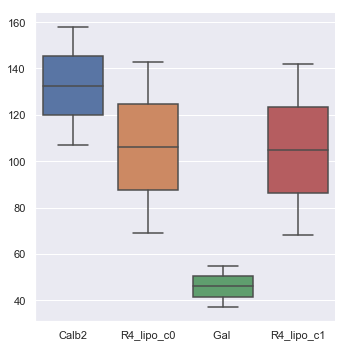

In [227]:
sns.catplot(kind="box", data=e)

In [111]:
spots_proc.shape[0]-np.count_nonzero(spots_proc['Meis2-R10'].as_matrix())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


1745

In [169]:
np.count_nonzero(lipo['R10_lipo_c1'].as_matrix())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


7644

In [170]:
np.count_nonzero(lipo['R2_lipo_c1'].as_matrix())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


15282

In [166]:
np.count_nonzero(lipo['R10_lipo_c1'].as_matrix())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


7644

In [79]:
spots_raw.head()

,Meis2-R10,Th-R10,Gpr101-R10,Meis2,Th,Gpr101,Gpr83,Slc17a6,BdnF,Calb2,...,Tac1,Map1b,Trh,Nts,HCRT,Pmch,Cartpt,VGAT,SST,Nrgn
ROI #,,,,,,,,,,,,,,,,,,,,,
1.0,36,19,4,89,62,1,92,209,45,511,...,10,557,19,4,1423,51,9,29,29,9
2.0,50,1,10,82,26,0,17,11,12,37,...,63,178,1,4,2,43,16,61,87,40
3.0,57,49,8,98,87,1,0,109,21,550,...,11,197,11,4,14,1777,1053,58,64,17
4.0,70,40,6,78,71,0,0,113,84,90,...,4,0,33,3,12,2042,1254,36,62,19
5.0,66,37,121,99,49,26,10,51,34,65,...,111,288,24,263,25,41,35,251,78,289


In [112]:
spots_raw.shape[0]-np.count_nonzero(spots_raw['Meis2-R10'].as_matrix())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


1706

In [81]:
lipo.shape[0]-np.count_nonzero(lipo['R2_lipo_c1'].as_matrix())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


8919

In [82]:
spots_raw.shape[0]-np.count_nonzero(spots_raw['Th'].as_matrix())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


4924

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([51, 19, 30, ...,  1,  0,  0])

In [149]:
a=np.asarray((spots_raw.loc[spots_proc.index[spots_proc['Meis2-R10']==0],'Meis2-R10']).as_matrix())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [150]:
a=a[a!=0]

In [152]:
np.max(a)

4

In [171]:
b=np.asarray((spots_raw.loc[spots_proc.index[spots_proc['Th-R10']==0],'Th-R10']).as_matrix())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [198]:
lipo['R10_lipo_c1'].max()

32

In [182]:
lipo_c0=np.asarray(lipo['R2_lipo_c0'].as_matrix())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [183]:
lipo_c0.shape

(24201,)

In [143]:
b=np.asarray((spots_raw.loc[spots_proc.index[spots_proc['Th-R10']==0],'Th-R10']).as_matrix())

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [144]:
b=b[b!=0]

In [147]:
np.mean(b)

1.9341692789968652

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

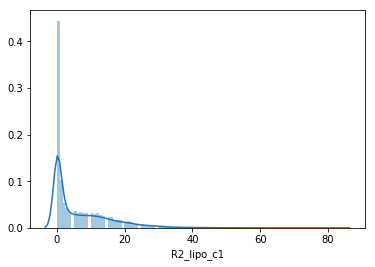

In [202]:
sns.distplot(lipo['R2_lipo_c1'], bins=100);

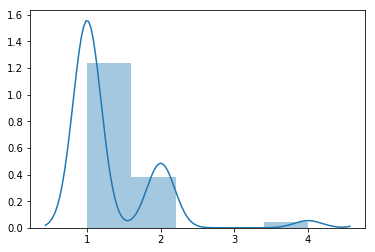

In [155]:
sns.distplot(a, bins=5);

In [4]:
lb=imread("/Volumes/multifish/Yuhan/LHA3/segmentation/segment/R3_label_affinity.tif")
nCells = np.max(lb)
print(nCells)

24201


In [4]:
    # get appropriate image data    
img='/Volumes/multifish/Yuhan/LHA3/stitch/R3_LHA3/export.n5/'
subpath='c2/s2'
#voxel size in µm (x, y, z)
vox= n5mu.read_voxel_spacing(img, subpath)
#image size in pixel (x, y, z)
grid=n5mu.read_voxel_grid(img, subpath)
size=grid*vox
print(vox)
print(grid)
print(size)

[0.92 0.92 0.84]
[1790 1790  811]
[1646.8  1646.8   681.24]


In [8]:
df = pd.DataFrame(np.empty([roi, 3]), columns=['roi','cetroid_position', 'area'],dtype=object)
lb_stat = regionprops(lb)
for i in range(0,roi): 
    df.loc[df.index[i], 'roi'] = i+1
    df.loc[df.index[i], 'cetroid_position'] = lb_stat[i].centroid
    df.loc[df.index[i], 'area'] = lb_stat[i].area
    
    
    
    #df.loc[df.index[j], 'shape'] = lb_stat[i].eccentricity

In [29]:
roi.shape

(20532, 9)

In [30]:
roi['roi']

(20532,)

In [38]:
a=min(roi['z'])
b=min(roi['y'])
c=min(roi['x'])

In [48]:
for i in range(0, roi.shape[0]): 
    roi.loc[roi.index[i], 'Distance']=distance.euclidean((roi.at[i,'z'],roi.at[i,'y'],roi.at[i,'x']),[a,b,c])

In [37]:
roi.loc[roi['roi']==6]

,roi,z,y,x,area,Distance,aspect_ratio,minor_axis_length,major_axis_length
4,6,546.07705,506.300982,1131.593313,49591,1298.903576,0.814997,50.354697,61.785094


In [38]:
roi.loc[roi['roi']==24201, 'minor_axis_length']=lb_stat[24201].minor_axis_length

IndexError: list index out of range

In [45]:
lb_stat[0].area
#lb_stat[1].minor_axis_length

49227

In [47]:
lb_stat = regionprops(lb)
for i in roi['roi']: 
    print(i,lb_stat[i-1].area)
    roi.loc[roi['roi']==i, 'minor_axis_length']=lb_stat[i-1].minor_axis_length
    roi.loc[roi['roi']==i, 'major_axis_length']=lb_stat[i-1].major_axis_length
    roi.loc[roi['roi']==i, 'aspect_ratio'] = roi.loc[roi['roi']==i, 'minor_axis_length']/ roi.loc[roi['roi']==i, 'major_axis_length'] 

1 49227
3 42389
4 50591
5 30370
6 49591
7 41499
8 16630
9 19549
10 34758
11 16429
12 42150
14 57659
15 36738
16 54259
18 47698
19 17612
20 30997
21 60713
23 15192
24 21168
25 25171
26 48681
28 38363
29 55926
30 44385
31 35529
32 42596
33 15756
34 41256
35 28435
36 21591
37 23484
38 60065
39 21876
40 19164
41 54594
42 28225
44 23131
45 14428
47 16574
49 41592
51 11731
52 35623
53 73817
54 39842
55 40568
56 19517
57 18861
58 28251
59 18837
62 19290
63 42827
64 23285
65 25694
66 17682
68 24152
69 15905
70 22953
71 22437
72 31319
73 27512
74 13873
75 16496
77 24254
78 20984
80 38219
82 11602
83 16723
84 22475
85 15086
86 34044
87 14103
88 20518
89 12258
91 31991
92 26721
93 23318
94 20988
95 27770
96 29638
97 35758
98 22192
99 22182
100 20515
101 18898
102 17161
103 33788
104 21730
106 14673
107 22981
109 43736
110 40566
111 33004
112 32649
114 16704
116 22418
118 26430
119 26414
120 15212
121 22685
124 16791
125 21186
126 50922
128 21557
129 15550
130 25381
131 32313
133 24441
134 48238
1

966 4153
967 15085
968 22975
969 22514
970 15268
971 18987
972 12157
973 10519
975 20520
976 23981
977 23556
978 17839
979 20825
980 16725
981 16357
982 16230
983 14234
984 15645
985 19155
986 14764
988 10932
989 9798
990 24632
991 13578
992 13810
993 17382
994 35249
995 17224
996 22183
997 14764
998 11472
999 22979
1000 19507
1003 30298
1004 24441
1005 18817
1006 19954
1007 18361
1008 18388
1009 18372
1010 18972
1011 33637
1013 18238
1014 20825
1015 21814
1016 19789
1017 17118
1018 11685
1019 18490
1020 20521
1021 17624
1022 19725
1023 21327
1024 18452
1025 12750
1026 17627
1027 15258
1029 28983
1030 13426
1032 20281
1033 23302
1034 18093
1038 19828
1039 13943
1040 19338
1042 22626
1043 22141
1044 4186
1045 19448
1047 14465
1048 17869
1049 20643
1050 16131
1051 22192
1052 13912
1053 20019
1054 34562
1055 15263
1057 19184
1058 16942
1059 15355
1060 12566
1061 55500
1062 19162
1063 31482
1064 21910
1065 24793
1066 17523
1068 21147
1069 9329
1070 18831
1071 35154
1072 15814
1073 12629
10

1881 17894
1882 13983
1883 16456
1884 22364
1886 24007
1887 23440
1888 14488
1889 17454
1891 15293
1892 14297
1894 18329
1895 16568
1896 11759
1897 21809
1898 20907
1899 16948
1900 18225
1901 18787
1902 12555
1903 16074
1904 21791
1905 10117
1907 19701
1908 13147
1909 14821
1910 14336
1911 16676
1913 18746
1914 13622
1915 15690
1916 19548
1917 13403
1918 15794
1920 17500
1921 16320
1926 14360
1928 12682
1929 13512
1931 10312
1933 24504
1934 14127
1935 15324
1936 18144
1937 18083
1938 14152
1939 17014
1940 12985
1941 16132
1942 14117
1943 16924
1944 25808
1945 19623
1948 11271
1949 25105
1950 15025
1951 13767
1952 17247
1956 15520
1957 18571
1961 13943
1962 12441
1964 18168
1965 13233
1966 17786
1969 13807
1970 17367
1971 14414
1972 11528
1973 15615
1974 13922
1976 16573
1977 16729
1978 10257
1979 10112
1980 14154
1982 11922
1983 21908
1984 21775
1985 14254
1986 12144
1987 17369
1988 17197
1989 15823
1990 20525
1991 17971
1992 19939
1993 17490
1994 19705
1999 24173
2000 16060
2001 20129

2801 12337
2802 28446
2803 23084
2805 20645
2806 14557
2807 19066
2808 15385
2809 16770
2810 19598
2812 15645
2813 16770
2814 17888
2817 19696
2818 26535
2819 25614
2820 11118
2821 15800
2822 14158
2824 14456
2826 12039
2827 14514
2828 15243
2830 20886
2831 11232
2833 13246
2834 13853
2835 15886
2836 19125
2837 11926
2839 15018
2841 11545
2842 17437
2843 14250
2845 13691
2847 12239
2848 11551
2850 20390
2851 20022
2852 20102
2853 13055
2854 10863
2856 12888
2857 22181
2858 18729
2859 11849
2860 15877
2861 17684
2863 27862
2864 17487
2865 17544
2866 14833
2867 13542
2869 16172
2870 14202
2871 17127
2872 12173
2873 11300
2874 16935
2875 13411
2876 12489
2877 20225
2878 15549
2879 18909
2881 16080
2882 13297
2883 16571
2884 20892
2885 19796
2886 16558
2887 12257
2888 13531
2889 6351
2890 19982
2891 11904
2892 20053
2893 13840
2896 15566
2897 13746
2898 24582
2899 15253
2900 20832
2901 16906
2903 14686
2904 10389
2905 15653
2906 20654
2907 14632
2908 18333
2910 12274
2912 13647
2913 18732


3722 15480
3723 17884
3726 15028
3727 3792
3728 17608
3729 17342
3730 21215
3731 24707
3732 23851
3733 14147
3734 11520
3735 16437
3737 29083
3738 15813
3739 11919
3740 18606
3741 11494
3742 14231
3744 17762
3745 14550
3747 14093
3749 18999
3750 14765
3751 12803
3753 13672
3754 13950
3756 17599
3757 17319
3758 13116
3759 12948
3760 21551
3761 12427
3762 26943
3763 12314
3764 18165
3765 15656
3768 11671
3769 10647
3771 11438
3772 17781
3773 14458
3774 25144
3775 15365
3776 13781
3777 21758
3778 23437
3780 15393
3781 17868
3782 16193
3783 15292
3785 23794
3786 15658
3787 17121
3788 14559
3789 13650
3790 22338
3791 12016
3792 15266
3793 16319
3794 14417
3795 13611
3796 29417
3797 11023
3798 15137
3799 22229
3800 19412
3802 11411
3803 19306
3804 14565
3806 26314
3807 20843
3808 15774
3809 13634
3812 11086
3813 22173
3814 25525
3815 10880
3816 12902
3817 15164
3819 11698
3820 10807
3821 17736
3822 19742
3823 12971
3825 21113
3826 19611
3827 13017
3828 17189
3830 14568
3831 13792
3832 20352


4643 13368
4644 45410
4645 11958
4646 20637
4647 12247
4649 11207
4650 14441
4651 20254
4652 14046
4653 34244
4654 13438
4656 11650
4657 13166
4658 13521
4659 13196
4660 11901
4661 27385
4662 10380
4663 15297
4664 18271
4665 14931
4666 14822
4667 14180
4668 15922
4669 10618
4670 10787
4671 17871
4673 15417
4675 14740
4676 11625
4677 10266
4678 13866
4679 22685
4680 13646
4681 17567
4682 11151
4684 11618
4685 12217
4687 19578
4688 11652
4689 11341
4690 35252
4692 8011
4694 16937
4695 13755
4696 16020
4697 17589
4700 12935
4701 10610
4702 15874
4703 13178
4704 11261
4705 11794
4706 17992
4709 9785
4711 11944
4712 15241
4713 10852
4714 11903
4715 17198
4716 11538
4717 18050
4718 11911
4721 13297
4722 13670
4724 25732
4725 9721
4726 26661
4727 22768
4728 55207
4730 12177
4733 33519
4734 8973
4735 12104
4736 22495
4737 17121
4738 14283
4739 17911
4740 12608
4741 13852
4742 12034
4744 17447
4745 14426
4746 14987
4748 12442
4749 12294
4750 18598
4751 16138
4752 17371
4753 18162
4755 17476
475

5538 26554
5540 15661
5542 10690
5544 14787
5545 18756
5547 16077
5548 11918
5549 10599
5550 15020
5551 13435
5552 19800
5553 19020
5554 26791
5555 21395
5556 14075
5559 4785
5560 16411
5561 23826
5562 28110
5563 9675
5565 13111
5566 14045
5568 7758
5569 10596
5570 19564
5571 16068
5572 12725
5573 22191
5574 17541
5575 15577
5576 14721
5577 16147
5578 20361
5579 19285
5580 14484
5581 12741
5582 24351
5584 14913
5586 18026
5587 23573
5588 9482
5590 4659
5591 16229
5592 18776
5593 20807
5594 12881
5595 15255
5596 22823
5597 17470
5598 10653
5600 13335
5601 15222
5602 12172
5603 7598
5604 11154
5605 4351
5606 16313
5607 10976
5608 18564
5609 13360
5611 17157
5612 11941
5613 9783
5614 18800
5615 21679
5617 23205
5619 14982
5620 12373
5621 15892
5622 14426
5623 16553
5624 15882
5625 15347
5626 10737
5628 13609
5630 11052
5631 11013
5632 13713
5633 12487
5634 10589
5636 13197
5637 14170
5638 13622
5639 15469
5640 15527
5641 20998
5642 11945
5643 15087
5644 12787
5645 20113
5646 11497
5647 16

6464 13403
6465 8126
6466 20711
6467 10468
6468 16273
6469 20391
6470 11965
6474 9909
6475 14479
6476 9472
6477 19198
6478 16247
6479 11886
6480 11652
6482 11451
6483 15011
6484 17470
6485 11994
6486 12383
6487 14033
6488 13432
6489 12204
6490 18225
6491 13563
6492 18924
6493 13532
6494 12920
6495 11169
6496 21704
6497 13063
6498 12213
6499 10880
6500 12675
6501 11180
6502 15124
6503 14804
6504 12876
6506 13965
6507 18934
6510 26590
6511 20402
6512 25061
6513 24286
6514 10435
6515 17630
6516 36334
6517 9674
6518 10995
6519 13427
6520 19845
6521 9606
6522 16467
6523 22108
6524 13132
6525 6402
6526 19474
6527 10764
6528 14382
6529 18288
6530 16012
6531 28643
6532 13667
6533 11774
6534 12909
6535 16296
6536 10616
6537 9771
6538 11195
6542 14294
6543 17283
6544 15719
6545 13236
6546 20284
6547 17695
6548 13118
6549 12597
6550 11234
6551 21664
6552 12344
6553 17238
6554 12677
6555 13860
6556 8739
6557 16837
6558 17906
6559 11815
6560 15892
6561 10196
6562 13280
6563 10349
6564 11455
6565 93

7398 12239
7400 15920
7401 10974
7405 14251
7406 9981
7407 10381
7409 16877
7410 10931
7411 12400
7414 21158
7415 14883
7417 15823
7418 25050
7419 14872
7421 20601
7422 17072
7423 15144
7425 14788
7426 25151
7427 5906
7428 14672
7429 18599
7430 18721
7431 23914
7432 19045
7436 9104
7437 11271
7438 16142
7439 11845
7441 11457
7442 19212
7443 8954
7444 12779
7445 14595
7446 13658
7447 15744
7449 47259
7450 16059
7451 9917
7453 15633
7454 14673
7456 12881
7457 11907
7460 10349
7461 13551
7462 12402
7463 4468
7464 17151
7465 22126
7466 9588
7468 4364
7469 16026
7470 13526
7471 15084
7473 15922
7474 20695
7475 11652
7478 13663
7479 12185
7480 13076
7481 10172
7482 11380
7483 14486
7484 17072
7485 11360
7486 12524
7487 13928
7488 13952
7489 12631
7490 13659
7491 18487
7492 15965
7493 12640
7494 13355
7496 14119
7497 9842
7499 17850
7500 18753
7501 10996
7502 9822
7503 11626
7504 19054
7505 23829
7506 6778
7507 12120
7508 16738
7509 11725
7510 19671
7512 8317
7513 17399
7515 10064
7518 10941


8335 13956
8336 16877
8337 25244
8338 22462
8339 13595
8340 12746
8342 18695
8343 10801
8344 13492
8345 12100
8346 11340
8347 11927
8348 13660
8349 29994
8350 14146
8351 11515
8354 12861
8357 4441
8358 13028
8359 23281
8360 11024
8361 11916
8362 9548
8363 6363
8364 18125
8365 15496
8366 19883
8367 16244
8370 10028
8371 12977
8373 10941
8374 19469
8375 11894
8376 9801
8377 12294
8378 10511
8381 14580
8383 12738
8384 17149
8386 12144
8387 24137
8388 14390
8390 9346
8392 9600
8394 22230
8395 13628
8396 12616
8397 9697
8399 19552
8401 12013
8404 14823
8405 11720
8406 8408
8407 10738
8410 21500
8411 17255
8412 12524
8413 9806
8414 18981
8416 12290
8418 12038
8419 17372
8421 13388
8422 14008
8423 9979
8425 14711
8427 17163
8428 19018
8429 7553
8430 17123
8431 12531
8433 13032
8434 9229
8435 11572
8436 15429
8438 10437
8439 13319
8440 10513
8442 12213
8443 9647
8444 15069
8446 12079
8447 14295
8448 19941
8449 18290
8450 18054
8452 10731
8454 11951
8456 16058
8457 9917
8459 11004
8460 21498
84

9261 11987
9263 10480
9264 11363
9265 22121
9266 13130
9267 35604
9268 7421
9269 10873
9270 6119
9271 20425
9273 13995
9274 16783
9276 14789
9277 22728
9278 9179
9279 13586
9280 16724
9281 13217
9282 12821
9283 28727
9284 15653
9285 11098
9286 11145
9287 11439
9288 15009
9289 12629
9290 11337
9291 16745
9292 10164
9293 16739
9294 15244
9295 11750
9298 4837
9299 12736
9300 12663
9301 12425
9302 11945
9303 13297
9304 12690
9305 16339
9306 25304
9307 10784
9309 6890
9310 16884
9311 12540
9312 13010
9313 13211
9314 12506
9315 29390
9316 12377
9318 13423
9319 11601
9320 12938
9321 16251
9323 10773
9324 12606
9325 25744
9326 16278
9327 9733
9328 11870
9329 11179
9330 11075
9331 9706
9332 10383
9333 11026
9335 10105
9336 7322
9337 16642
9338 4424
9339 16123
9340 13815
9341 17202
9342 8554
9343 18873
9344 17826
9345 10744
9347 18449
9348 13547
9349 7064
9350 15860
9352 7799
9353 11314
9354 13884
9355 12105
9356 15313
9357 13224
9358 9422
9359 12246
9360 15594
9361 13408
9363 11071
9364 16200
9

10149 18160
10150 13035
10152 7600
10153 11526
10155 13252
10156 18225
10157 44798
10159 14426
10160 11653
10161 7280
10162 15619
10164 23909
10165 16191
10166 10595
10167 17023
10169 15774
10170 17017
10171 11644
10172 12846
10173 11176
10174 3367
10175 12648
10176 13675
10177 26148
10178 10544
10179 12775
10180 10682
10181 13278
10183 10741
10184 15753
10185 19306
10186 12248
10187 13717
10188 12595
10189 12904
10190 10132
10191 3322
10192 14293
10193 14306
10194 14432
10195 24811
10196 19029
10197 12304
10198 14437
10201 13930
10202 15664
10203 13245
10204 20836
10206 10445
10207 13343
10208 10612
10209 16901
10210 10042
10211 16786
10212 14574
10214 3607
10215 12396
10216 17804
10217 12037
10219 14585
10220 16253
10221 11021
10222 16157
10223 9473
10224 3586
10227 10876
10230 8456
10231 15148
10232 13143
10233 11393
10234 21047
10235 19631
10236 4928
10237 13006
10238 13879
10240 20521
10241 3697
10243 23795
10245 14526
10246 9050
10248 4048
10249 10152
10250 19522
10252 12764
1025

10992 14272
10993 9674
10994 3524
10995 14272
10996 12017
10997 8902
10999 17160
11000 13630
11001 19049
11002 11092
11003 11971
11004 20292
11005 15125
11006 31799
11007 18413
11008 4028
11010 13266
11011 12710
11012 4017
11014 14395
11015 10708
11017 12170
11019 9800
11020 13621
11022 12148
11023 7844
11024 15271
11025 11165
11026 4141
11027 12485
11028 13588
11029 14853
11030 11013
11031 9638
11032 11995
11033 19831
11034 12475
11036 8888
11037 4315
11038 12026
11039 15816
11042 14099
11043 16926
11044 9990
11045 12232
11046 20990
11047 4335
11048 11750
11049 7870
11052 4080
11053 11724
11054 5650
11055 17086
11056 12886
11057 28220
11059 17189
11060 8837
11062 3285
11063 21572
11064 14813
11065 11101
11067 11128
11069 12134
11070 15129
11072 5509
11073 13676
11074 34322
11075 7198
11076 9932
11077 11009
11078 6795
11080 9913
11081 18672
11082 12923
11084 3414
11086 11315
11087 12452
11089 10406
11090 13545
11091 23722
11092 16885
11093 24370
11094 12120
11096 13340
11097 4210
11098

11842 4322
11843 4237
11845 15628
11846 11874
11847 19092
11848 33163
11849 4331
11850 10342
11851 5046
11853 11192
11857 13693
11858 12786
11859 16940
11860 3505
11861 12065
11862 9892
11863 15964
11864 13366
11865 10824
11866 7396
11867 19681
11868 4050
11869 19135
11870 17445
11871 14400
11873 20572
11875 4778
11876 12288
11877 15358
11878 17858
11879 13971
11880 3425
11881 6557
11882 10321
11883 15507
11884 10138
11886 5458
11887 16227
11889 11141
11890 10536
11892 8005
11893 13090
11894 4124
11895 9001
11896 7861
11897 10392
11898 9944
11900 23538
11901 4253
11902 16616
11903 10091
11904 11099
11905 24133
11906 6852
11907 10094
11908 14555
11909 14666
11910 17773
11911 3886
11912 7637
11913 3295
11915 16774
11916 11037
11917 9176
11918 20017
11919 18350
11922 16062
11923 7159
11924 14693
11925 12163
11926 19606
11927 10929
11928 11975
11930 13039
11931 14140
11932 13953
11933 4013
11934 4613
11935 4369
11936 10184
11937 3999
11938 16204
11939 8596
11942 10477
11943 9932
11944 4043

12683 15989
12684 3683
12685 28027
12687 20495
12689 7575
12690 17163
12691 4314
12692 9928
12693 9712
12694 3927
12695 14472
12697 3898
12699 4089
12700 18049
12701 7315
12702 15975
12704 6647
12706 4096
12708 30317
12709 3841
12710 7374
12711 3351
12712 3553
12714 13572
12715 10155
12716 12245
12717 5999
12718 17436
12719 8033
12721 8968
12722 7887
12723 9106
12724 9456
12725 10983
12727 18538
12728 16759
12729 3255
12730 14962
12731 2678
12732 14298
12733 24005
12734 4628
12735 8288
12736 6152
12737 8902
12738 13694
12739 10142
12741 9926
12743 13012
12744 3978
12745 10792
12746 20967
12747 11775
12748 19355
12749 11501
12750 14634
12751 12138
12752 12091
12753 22346
12754 14308
12755 3702
12756 3139
12757 11357
12758 11614
12759 10738
12760 4740
12761 13923
12762 16998
12763 7915
12765 4348
12766 5075
12767 5541
12768 6497
12769 3690
12770 4415
12771 10518
12772 10355
12773 4059
12775 12031
12776 3407
12777 14815
12779 11856
12780 5890
12781 17439
12782 9076
12783 5933
12784 4952
1

13518 10602
13519 4695
13521 4587
13522 7704
13523 8745
13524 2983
13525 9442
13526 4140
13527 3875
13529 10797
13530 13958
13531 16106
13532 7264
13533 4353
13534 20084
13535 8517
13536 27435
13537 8165
13538 5618
13539 13960
13540 5542
13541 9276
13542 5462
13543 8927
13544 4387
13546 10477
13548 4477
13549 13107
13550 4928
13551 3475
13552 4323
13553 41298
13554 11557
13555 9045
13556 4532
13557 5167
13559 3732
13560 3656
13562 10506
13563 9759
13564 6147
13565 6172
13566 7347
13567 11193
13570 4241
13571 5285
13572 9985
13573 5071
13574 11167
13575 11300
13576 4802
13577 10485
13578 4298
13579 8789
13580 17109
13581 4134
13582 12612
13583 9980
13584 11824
13585 3534
13586 5021
13587 12389
13588 15408
13589 15254
13590 17594
13591 8057
13592 11281
13593 4095
13594 15617
13597 4894
13598 12269
13599 25339
13600 5529
13601 4485
13602 16386
13603 4311
13604 9287
13605 13040
13606 9725
13607 19614
13608 8508
13609 19494
13610 9626
13611 3846
13612 4188
13613 5920
13614 3815
13615 13035


14365 4203
14366 7158
14367 15355
14368 7302
14369 4053
14370 8655
14371 11020
14372 4316
14373 8880
14374 4373
14375 4187
14376 3362
14377 13593
14378 8782
14379 4001
14380 4612
14381 3667
14382 12001
14383 10520
14384 10566
14385 3708
14386 8155
14387 3424
14388 23676
14389 4729
14390 3140
14391 11892
14394 7780
14395 3675
14396 8266
14397 7412
14398 3678
14399 2920
14400 5160
14401 4205
14402 4451
14403 68373
14405 4707
14406 11832
14407 3403
14408 3046
14409 5117
14410 5247
14411 12494
14412 7901
14413 17046
14414 7718
14416 15530
14417 13776
14418 9442
14419 4731
14420 3837
14421 4248
14422 14206
14423 2785
14424 3661
14425 12599
14426 3905
14427 5202
14428 4002
14430 12360
14431 3571
14432 6019
14433 14580
14434 5235
14435 19552
14436 3849
14437 3562
14438 13284
14439 13741
14440 13543
14441 14428
14442 5170
14443 4150
14444 16910
14445 4820
14446 15281
14447 8825
14449 6723
14450 6209
14451 9711
14452 16023
14453 6261
14454 4682
14455 4931
14457 3100
14459 6541
14461 3698
14464 

15234 16814
15235 4036
15236 4598
15237 4283
15238 3954
15239 11308
15240 5402
15241 5113
15242 8648
15244 6586
15245 5074
15246 12969
15247 3701
15249 13584
15250 3701
15251 7691
15252 17881
15253 3611
15254 7891
15255 8304
15256 8254
15257 4230
15258 7959
15259 3527
15260 11042
15262 5531
15263 4560
15264 3670
15265 3069
15266 4684
15267 17548
15268 2953
15269 6311
15270 7764
15271 8110
15273 4449
15274 3789
15275 4778
15276 3231
15277 2369
15278 4011
15280 6306
15281 3430
15282 14051
15283 10249
15284 8741
15285 3528
15286 3613
15287 4397
15288 3513
15289 5502
15290 5844
15291 3712
15292 3555
15293 7296
15294 3480
15295 3743
15297 10947
15298 10957
15299 4553
15300 23160
15301 3491
15302 4235
15303 9722
15305 14439
15306 5127
15307 19774
15308 3083
15309 12412
15310 4673
15311 7501
15312 9420
15313 4197
15314 4255
15315 4469
15316 10993
15317 3504
15318 10490
15319 10650
15320 4500
15321 6945
15322 3538
15323 3757
15324 3031
15325 11006
15326 5985
15327 9966
15328 8614
15330 16862
1

16079 4100
16080 3765
16081 4713
16082 11266
16083 3801
16084 4031
16085 8393
16086 14033
16087 3965
16088 3848
16089 3050
16090 3414
16091 17938
16092 3477
16093 3562
16094 12540
16095 15108
16096 18955
16098 3976
16099 4024
16100 11062
16101 3741
16102 6101
16103 11068
16104 5448
16105 4004
16106 5121
16107 4284
16108 6495
16109 7447
16110 3543
16111 3942
16112 7735
16113 5749
16114 9949
16115 9919
16116 3645
16117 13634
16118 3172
16119 15126
16120 4365
16122 4059
16123 3406
16124 3834
16126 3213
16127 3681
16128 4691
16129 3897
16131 15393
16133 4065
16134 4098
16136 3252
16138 13258
16139 5871
16140 10190
16141 6999
16142 7267
16143 14723
16144 3462
16145 4589
16146 15295
16147 5623
16148 9918
16149 3623
16150 4014
16151 16952
16152 4158
16153 10654
16154 14628
16155 4757
16156 7305
16157 21006
16158 6822
16159 4359
16160 4093
16161 4898
16162 3455
16163 3418
16164 4657
16165 5540
16166 3762
16167 11454
16168 3359
16169 4775
16170 9299
16171 4084
16172 5028
16173 9366
16175 4232
1

16939 7099
16940 3392
16941 2764
16942 4339
16943 9867
16944 8476
16945 3693
16946 8728
16947 12052
16948 10826
16949 6633
16950 3577
16951 4190
16953 6024
16954 5129
16955 3740
16957 4798
16958 4909
16959 4819
16960 4243
16961 4362
16962 4740
16963 3585
16964 2870
16965 4066
16966 3207
16967 3923
16969 3732
16970 7130
16971 3769
16973 14986
16974 4136
16975 4247
16976 3227
16977 3875
16978 11512
16979 4366
16981 8064
16983 3990
16984 3633
16985 4130
16986 5455
16987 4872
16989 13402
16991 3164
16992 4025
16993 4619
16994 3084
16995 10263
16996 3826
16997 5156
16998 10334
16999 3583
17000 7080
17001 3675
17003 10156
17004 4260
17005 9776
17006 3000
17007 3988
17008 3901
17009 7937
17010 4259
17011 8226
17012 3437
17013 3534
17014 3873
17015 2965
17016 4749
17017 3469
17018 3909
17019 2861
17020 5241
17021 5140
17022 16707
17023 3889
17025 8781
17026 9354
17027 12436
17028 4015
17029 4479
17030 4401
17031 4091
17032 8115
17034 7780
17035 5648
17036 3693
17038 3292
17039 3807
17040 3202


17799 4038
17800 3624
17802 3863
17803 4134
17804 3225
17805 6297
17806 9316
17807 4385
17808 4930
17809 6142
17810 3886
17811 3918
17812 4824
17814 9764
17816 3449
17817 3736
17818 3603
17819 6329
17820 6971
17821 3404
17822 4331
17824 5063
17825 6415
17826 3582
17827 3005
17828 3896
17830 10244
17831 12831
17832 2235
17833 4024
17834 13929
17835 5107
17837 4078
17838 3036
17839 4716
17840 5691
17841 7607
17842 5303
17843 10170
17844 3565
17845 3387
17846 2658
17848 3691
17849 2571
17850 4733
17853 15202
17854 5620
17855 3194
17856 17414
17857 4249
17858 7727
17859 11024
17860 4435
17862 8566
17863 3437
17864 4144
17865 3094
17866 9414
17867 4129
17868 3819
17869 3518
17870 6740
17871 3619
17872 4373
17873 17722
17874 4138
17877 5750
17878 10903
17879 4331
17880 5537
17881 4377
17882 5066
17883 8624
17885 3611
17886 5158
17887 12105
17888 2897
17889 9646
17890 4148
17891 8304
17893 11141
17894 4560
17895 3736
17896 3444
17897 6480
17898 2988
17899 4324
17900 20130
17901 5105
17902 362

18672 9670
18674 7323
18675 3255
18676 3727
18677 3753
18678 9274
18679 3482
18680 3575
18681 10029
18682 3709
18683 5303
18684 3207
18685 3775
18686 10251
18687 4816
18688 2721
18690 3058
18691 2603
18692 11918
18693 2068
18694 3504
18695 2880
18696 8469
18697 4727
18698 7630
18699 4274
18700 7865
18701 3270
18702 3115
18703 3412
18704 4304
18705 3505
18706 3147
18708 6300
18709 2871
18710 18961
18711 2920
18712 11922
18713 4288
18715 5134
18716 7390
18717 3882
18718 3880
18720 2881
18721 6348
18722 3619
18723 2508
18724 6277
18725 4361
18726 2634
18728 4149
18729 4702
18730 3554
18731 2376
18732 3124
18733 3086
18735 4311
18737 8047
18738 5395
18739 4522
18740 9328
18741 5007
18742 3180
18743 4449
18744 4594
18745 2599
18746 3230
18749 2659
18752 3174
18753 9584
18754 3244
18755 4110
18756 6628
18757 7630
18758 4105
18759 3045
18761 4568
18763 6570
18764 3039
18765 5735
18766 9338
18767 3262
18768 3936
18769 3950
18771 8943
18772 2907
18773 4536
18774 3937
18775 4199
18776 3424
18777

19554 4673
19555 6141
19556 3392
19557 2775
19558 3547
19559 5975
19560 4323
19562 6120
19563 2306
19564 3374
19565 3898
19566 4217
19567 3080
19568 4246
19569 2705
19570 3319
19571 3372
19573 4117
19574 4018
19575 3684
19576 3641
19577 6142
19578 3569
19579 5842
19580 2242
19582 7492
19583 5781
19584 3952
19585 3645
19586 3579
19587 8623
19588 13101
19589 3894
19590 3503
19591 4628
19593 4155
19594 4412
19595 2693
19596 4089
19597 3305
19598 8896
19599 2613
19600 13388
19601 4020
19602 15408
19605 3082
19606 2924
19607 4253
19608 5928
19609 3276
19610 10543
19611 3999
19613 4069
19614 4082
19615 3071
19616 5178
19617 10273
19618 4867
19619 2969
19620 4675
19622 3632
19625 12280
19626 2712
19629 3727
19630 3101
19631 7331
19632 3128
19633 3311
19634 3222
19636 4594
19638 5980
19639 2946
19640 7992
19641 3437
19642 3404
19644 7526
19645 5563
19646 3227
19647 6618
19648 12010
19649 3691
19650 3771
19651 3126
19652 3249
19653 5527
19654 5053
19655 3416
19656 7529
19657 11068
19660 7037
19

20421 7108
20422 5732
20424 3425
20425 3607
20426 2839
20427 3408
20428 6283
20429 6405
20430 4354
20431 3373
20432 3640
20433 1874
20435 4783
20436 9781
20437 4370
20439 3466
20440 10208
20441 5109
20442 3253
20443 3305
20446 4944
20449 2536
20451 3697
20452 13539
20453 3166
20454 4794
20455 3794
20456 6244
20457 4599
20458 4185
20459 2979
20460 5374
20461 2926
20462 3971
20463 3222
20465 4607
20467 5601
20468 4707
20469 3967
20470 5720
20471 2883
20472 3279
20473 7165
20474 7910
20475 3735
20476 2960
20477 3757
20478 3338
20479 3898
20480 7586
20482 4819
20483 4812
20484 3459
20485 3550
20487 5579
20488 3671
20489 2795
20490 3368
20491 22145
20492 5735
20493 4952
20494 4107
20495 3323
20496 7158
20497 2798
20498 2910
20499 2795
20500 3395
20501 4052
20502 4152
20503 4183
20504 9118
20505 4333
20506 2312
20507 8009
20509 1977
20510 3213
20511 3999
20512 3986
20513 5081
20514 8263
20515 3625
20516 11080
20517 2825
20518 7866
20519 3421
20521 12359
20522 7677
20523 2824
20524 4897
20525

21273 4008
21274 2407
21275 3510
21276 3218
21278 3892
21279 6128
21281 2522
21282 2919
21284 3157
21285 2514
21287 3978
21288 4082
21289 3324
21290 4337
21291 4005
21292 4312
21295 2661
21296 3457
21297 4883
21298 3396
21299 9067
21300 14525
21301 3035
21302 3406
21303 3417
21304 3685
21305 5331
21306 9195
21307 4255
21308 3462
21310 3221
21311 4675
21312 8094
21314 1639
21318 4924
21320 3367
21321 7785
21323 4268
21325 4080
21326 7109
21327 4617
21328 9847
21329 3697
21330 2416
21331 2559
21332 2827
21333 4952
21334 2724
21335 3170
21336 3105
21337 4215
21338 3574
21339 4739
21340 3304
21341 4861
21342 2645
21343 4346
21344 3514
21347 2443
21348 2976
21349 6452
21350 19936
21351 5744
21352 2562
21353 3651
21354 3221
21355 8182
21356 3281
21357 5179
21358 3217
21359 6121
21360 8716
21363 2849
21365 2144
21366 2547
21367 2930
21368 10945
21369 3447
21370 2781
21371 3412
21372 2650
21373 4768
21374 5307
21375 2361
21376 2714
21377 5224
21378 4855
21379 2687
21381 3329
21382 4097
21383 2

22140 3492
22142 2225
22143 2176
22144 2919
22145 5296
22146 3498
22147 6616
22148 5251
22149 5036
22150 2617
22152 5954
22153 3653
22154 3643
22155 8513
22157 2973
22158 2193
22159 2962
22160 4813
22161 3869
22162 3521
22163 3384
22165 5161
22167 2906
22168 3827
22169 2232
22170 1900
22173 4849
22174 3327
22175 2220
22176 5185
22177 3940
22178 4207
22179 2557
22180 4697
22181 3635
22182 3184
22183 2999
22184 3623
22185 4533
22186 2525
22187 2139
22188 2993
22189 2995
22191 8018
22192 3809
22194 5556
22195 2333
22196 4959
22197 5128
22198 3177
22199 2848
22200 2373
22201 5830
22202 3656
22203 7744
22204 2624
22205 4827
22206 4782
22207 6996
22208 2834
22209 5465
22210 3175
22211 4884
22212 2322
22213 2465
22214 3696
22215 3115
22216 2107
22217 5558
22218 2459
22219 2573
22220 2366
22221 3643
22223 2835
22224 5736
22225 1944
22226 5781
22227 7166
22228 3819
22229 2062
22230 4682
22231 4153
22232 2629
22233 3408
22234 4579
22235 4464
22236 2632
22237 4882
22238 6277
22239 3470
22240 6823

22973 5473
22974 5500
22975 5737
22976 2495
22977 3384
22978 2643
22979 3313
22980 3756
22981 4705
22982 2694
22984 2369
22985 2692
22986 4438
22988 4219
22989 4145
22990 2316
22991 6249
22992 3548
22993 6425
22994 9165
22996 2877
22997 2889
22998 1965
22999 2856
23000 6225
23002 3165
23003 2527
23004 4626
23006 2706
23007 3014
23009 6351
23010 6151
23012 1854
23014 4737
23015 4687
23017 5171
23018 3254
23019 3390
23020 2530
23021 3082
23022 3112
23023 3505
23024 2681
23025 4648
23026 2902
23027 2171
23028 3895
23029 5228
23030 2524
23031 4094
23032 2336
23033 2734
23034 4271
23035 3537
23036 1816
23037 2365
23038 2400
23040 5173
23041 2437
23042 4820
23043 6023
23045 30993
23046 2807
23047 4528
23048 1759
23050 2458
23051 6298
23052 6578
23054 6113
23055 2618
23056 5739
23057 3263
23058 5037
23059 3831
23060 7199
23061 3241
23062 3034
23063 3434
23064 2072
23065 11807
23068 4872
23069 3237
23070 1511
23071 4333
23072 2988
23073 5826
23075 2273
23076 3302
23077 2811
23078 6171
23079 33

23873 3428
23874 2690
23876 2140
23877 3537
23878 3262
23879 4881
23880 2321
23881 4240
23882 3777
23883 3863
23884 3759
23885 1890
23886 6830
23887 5020
23888 2804
23889 2215
23890 2201
23891 2495
23892 1459
23893 5839
23895 3328
23897 3818
23898 2099
23899 2194
23900 3409
23901 8762
23902 3405
23903 9072
23904 4054
23906 5808
23907 2424
23909 2742
23910 6093
23911 1565
23912 3336
23913 2629
23914 6473
23915 2497
23916 7893
23917 3111
23918 2190
23919 2264
23920 1714
23921 2767
23922 7378
23923 9809
23924 6859
23925 1963
23926 1802
23927 2154
23928 1851
23929 3907
23930 3923
23931 2004
23932 8262
23934 4171
23935 11207
23936 13731
23937 3751
23938 3755
23939 2929
23941 6695
23942 1895
23943 1753
23944 2954
23946 2325
23947 3712
23948 3037
23950 3175
23952 2272
23953 3511
23954 2099
23955 3687
23956 3802
23957 2576
23958 2736
23960 3498
23961 3034
23962 2311
23963 2829
23965 3466
23966 3452
23967 2837
23968 7850
23969 3184
23970 3714
23972 3837
23973 3399
23976 7543
23977 6857
23978 34

In [49]:
roi.to_csv("/Volumes/multifish/Yuhan/LHA3/segmentation/segment/roi_intact_with shape.csv", index=False)